In [26]:
import glob
import numpy as np
import pandas as pd 
from collections import defaultdict
from math import isclose
from matplotlib import pyplot as plt

In [25]:
runs = glob.glob('/home/gabrihacker/TNSM2022/results_rebuttal/napoli/*/*/*/*/*/*/')
for r in runs[:1]:
    params = r.split('/')
    sa, rf, k, ratio, dens = params[7:12]
    bp = '/'.join(params[:8])
    
    invmat = np.load(f'{bp}/inverse_translation_matrix.npy')
    viewsheds = np.load(f'{r}/viewsheds.npy')
    nodes = pd.read_csv(f'{r}/index.csv', 
                        sep=' ', 
                        header=0, 
                        names=['x', 'y', 'z', 'x_3003', 'y_3003', 'b', 'p_i']
                       ).set_index('p_i')
    links = np.argwhere(viewsheds) #get ones from the viewshed
    
    #create a dict with a list of bs that sees a point
    adjdict = defaultdict(list)
    for l in links:
        ant = l[1]
        p = l[0]
        if ant in nodes.index:
            adjdict[p].append(ant)
    
    max_angles = []
    mean_angles = []
    min_distances = []
    for p in adjdict.keys():
        bs_loc = invmat[p]
        dists = []
        angles = []
        vectors = []
        for ant in adjdict[p]:
            n = nodes.loc[ant]
            loc = np.array([n.x, n.y])
            vector = loc-bs_loc
            vectors.append(vector)
            dists.append(np.abs(vector))
            angles.append(np.degrees(np.arctan2(vector[0], vector[1])))            
        angles.append(angles[0])  ##Trick to create a ring
        angles = np.array(angles) #convert to numpy
        min_distances.append(min(dists))
        diffs = (angles[1:] - angles[:-1]) % 360  #modulo 360 to get positive  angles
        try:
            assert(isclose(sum(diffs),360) or isclose(sum(diffs),0))
            max_angles.append(diffs.max())
            mean_angles.append(diffs.mean())
        except AssertionError:
            pass
            # print(diffs)
            # print(angles)
            # print(vectors)
            # break          

In [36]:
len(adjdict)

183942

(array([  75., 5001., 7646., 5245., 4864., 7471., 6346., 7601., 9813.,
        9054.]),
 array([149.19855402, 170.27775255, 191.35695107, 212.4361496 ,
        233.51534812, 254.59454665, 275.67374517, 296.75294369,
        317.83214222, 338.91134074, 359.99053927]),
 <a list of 10 Patch objects>)

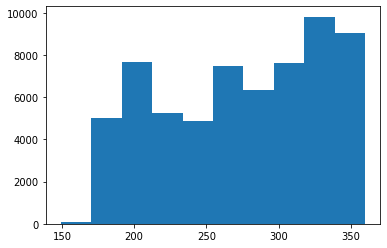

In [35]:
ma_data = np.ma.masked_equal(max_angles,0)
plt.hist(ma_data)

In [ ]:
max_di